## Final Project - Using Supervised Machine Learning to clasify human activity using smartphone sensor data.

## Project Description

In this project we will try to classify various human activities (e.g., walking, sitting, standing, laying) based on sensor data collected from smartphones.

## Data Set 

For this project we will use [Kaggel: Human Activity Recognition with Smartphones](https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones/data) dataset, which is a widely used and accessible version of original dataset hosted on the UCI Machine Learning Repository. This data is generated from a experiment carried out on a group of 30 volunteers with 19-48 years age bracket. Each person performed six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone on their waist to capture 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments were video recorded to label the data manually. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data. 
For each data row following is provided:
 - Dataset has 561-feature vector with time and frequency domain variables.
 - Its activity label.
 - An identifier of the subject who carried out the experiment.

## Project Goals

1. Exploratory Data Analysis (EDA): Inspect, visualize, and understand the characteristics of the sensor-derived features and their relationship to different human activities.

2. Supervised Machine Learning Model Analysis: Apply and evaluate various supervised classification models to predict human activities, compare their performance, and draw conclusions about their effectiveness.

## Load Data Set

In [11]:
import pandas as pd

# Load the datasets
print("Loading datasets...")
train_data = pd.read_csv('../data/train.csv')
test_data = pd.read_csv('../data/test.csv')

print(f"Training data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")

print("\nTraining Data Info")
print(train_data.info())


print("\nFirst few rows of training data:")
print(train_data.head(10))

Loading datasets...
Training data shape: (7352, 563)
Test data shape: (2947, 563)

Training Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB
None

First few rows of training data:
   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   
2           0.279653          -0.019467          -0.113462         -0.995380   
3           0.279174          -0.026201          -0.123283         -0.996091   
4           0.276629          -0.016570          -0.115362         -0.998139   
5           0.277199          -0.010098          -0.105137         -0.997335   
6           0.279454          -0.019641          -0.110022         -0.996921   
7           0.277432        

## Exploratory Data Analysis (EDA)

/var/folders/fk/00ns88w11d730txg0s1d70140000gn/T/ipykernel_42002/104987954.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x='Activity', order=train_data['Activity'].value_counts().index, palette='Set2')


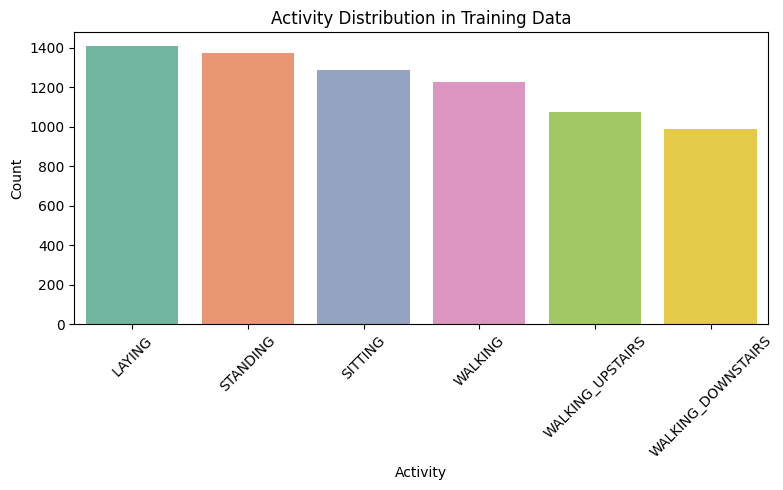

Mean and Std for first 5 features by Activity:


tBodyAcc-mean()-X           tBodyAcc-mean()-Y            \
                                mean       std              mean       std   
Activity                                                                     
LAYING                      0.269191  0.101541         -0.018345  0.073512   
SITTING                     0.273449  0.041998         -0.012143  0.032421   
STANDING                    0.279294  0.020097         -0.016123  0.017846   
WALKING                     0.276260  0.050353         -0.017768  0.020880   
WALKING_DOWNSTAIRS          0.288169  0.095101         -0.016370  0.027057   
WALKING_UPSTAIRS            0.261930  0.078029         -0.026647  0.037038   

                   tBodyAcc-mean()-Z           tBodyAcc-std()-X            \
                                mean       std             mean       std   
Activity                                                                    
LAYING                     -0.107169  0.089743        -0.959475  0.078712   
SITTING                    -0.106581  0.045323        -0.983450  0.032278   
STANDING                   -0.107330  0.035680        -0.985346  0.022872   
WALKING                    -0.108884  0.032436        -0.312641  0.144466   
WALKING_DOWNSTAIRS         -0.105860  0.050656         0.139847  0.222113   
WALKING_UPSTAIRS           -0.120424  0.060204        -0.221072  0.154418   

                   tBodyAcc-std()-Y            
                               mean       std  
Activity                                       
LAYING                    -0.937609  0.146916  
SITTING                   -0.936208  0.130081  
STANDING                  -0.936013  0.081921  
WALKING                   -0.020272  0.177670  
WALKING_DOWNSTAIRS         0.079184  0.243785  
WALKING_UPSTAIRS          -0.000348  0.201383

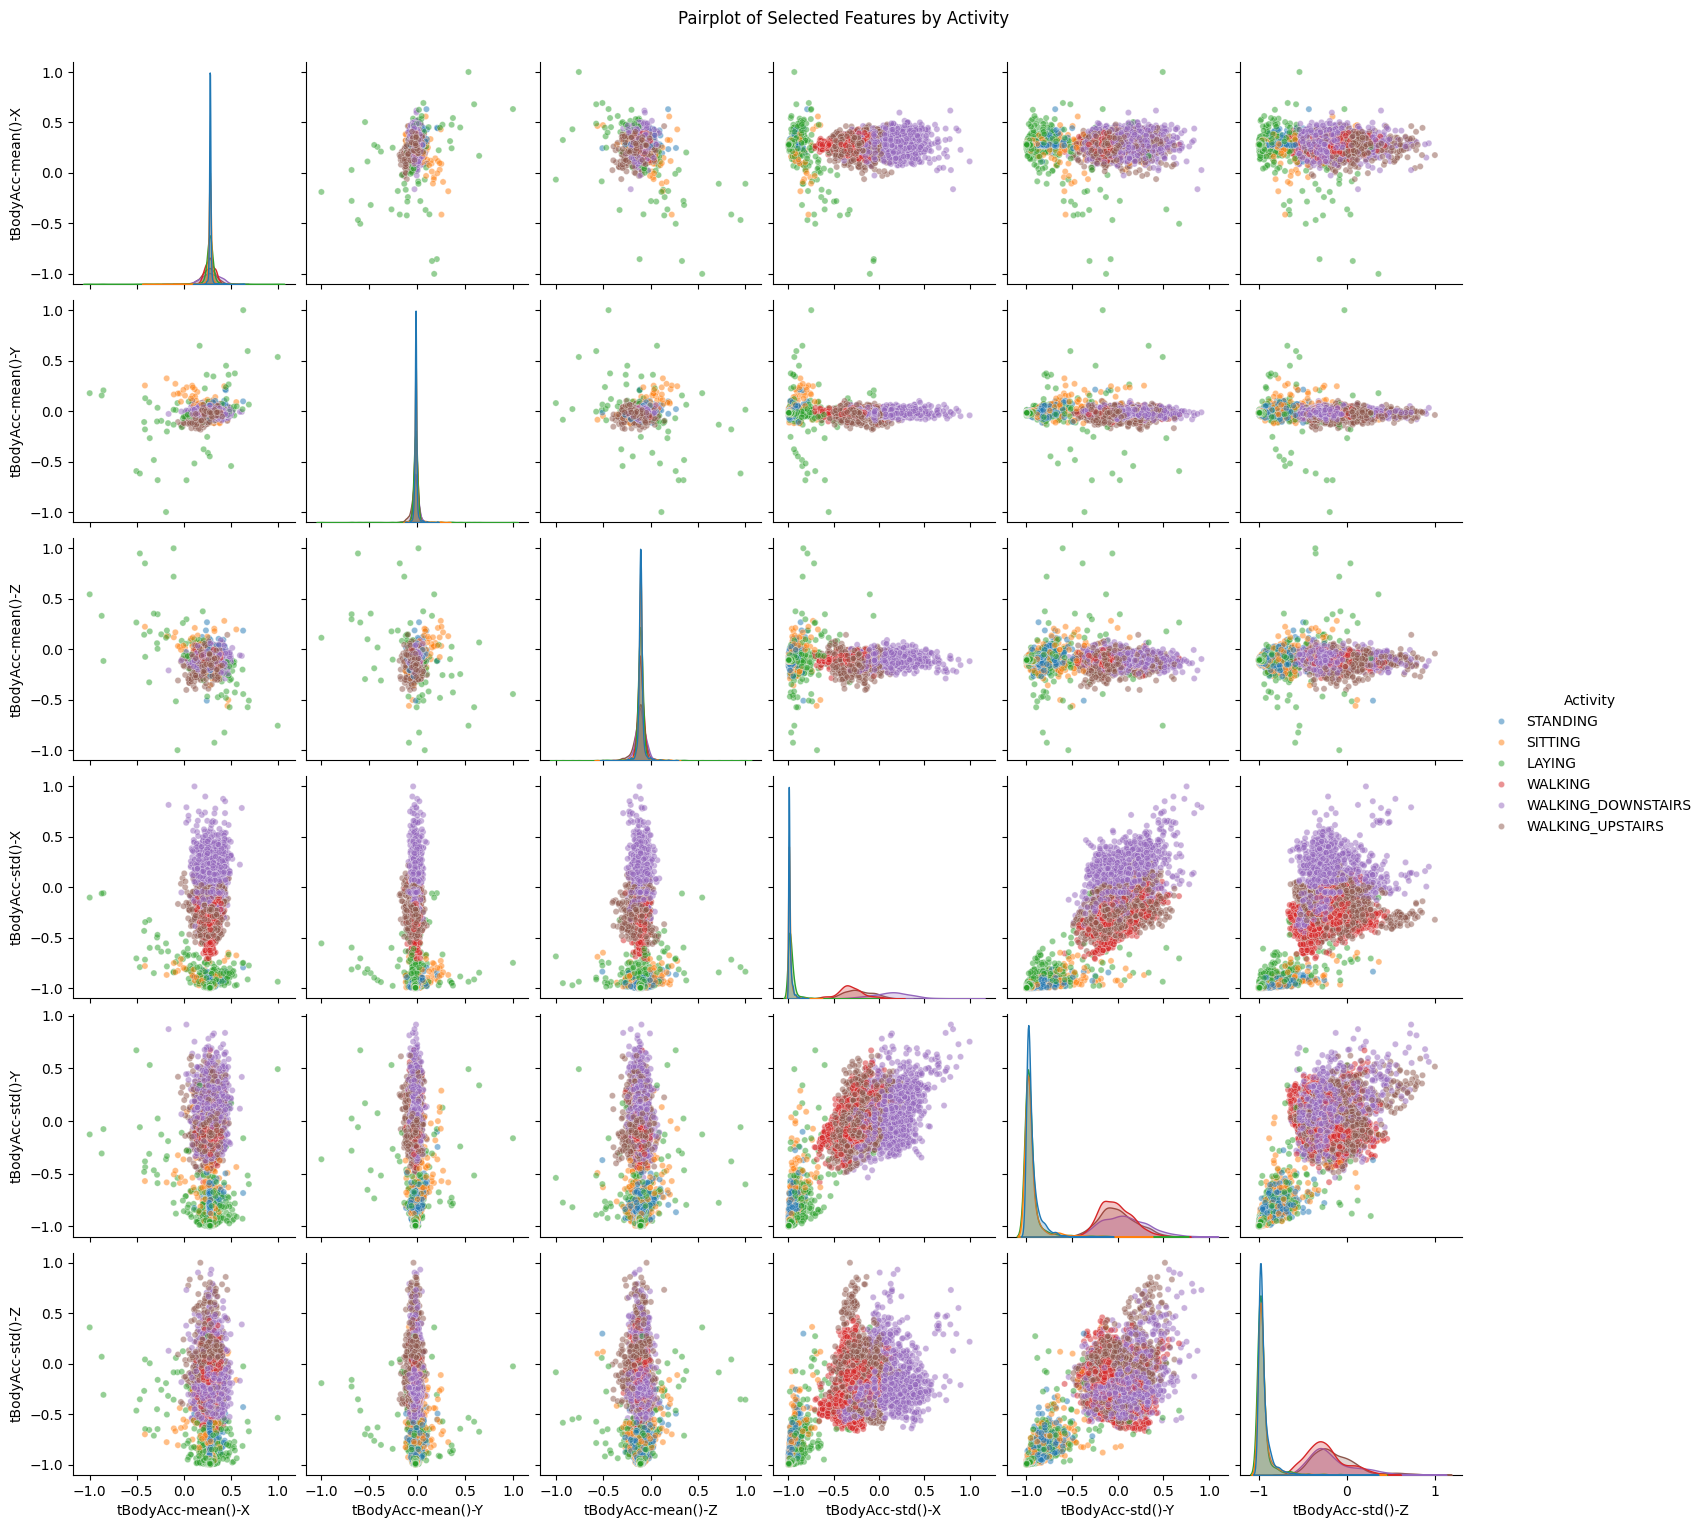

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# distribution of activities in the training set
plt.figure(figsize=(8, 5))
sns.countplot(data=train_data, x='Activity', order=train_data['Activity'].value_counts().index, palette='Set2')
plt.title('Activity Distribution in Training Data')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Show mean and std for a few example features by activity
example_features = train_data.columns[:5]  # first 5 features for demonstration
feature_stats = train_data.groupby('Activity')[example_features].agg(['mean', 'std'])

print("Mean and Std for first 5 features by Activity:")
display(feature_stats)


# Select a few representative features for pairplot
selected_features = [
    'tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
    'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
    'Activity'
]
sns.pairplot(train_data[selected_features], hue='Activity', diag_kind='kde', plot_kws={'alpha':0.5, 's':20})
plt.suptitle('Pairplot of Selected Features by Activity', y=1.02)
plt.show()

## Data Cleaning and Preprocessing

Following steps are performed to prepare our data for model training.

 - Duplicate detection and removal.
 
 - Split features and target. `activity` is the label that we want to predict, so we make it as target. `subject` is just and identifier for the person and doesn't need to be used as a feature so dropping that.
 
 - Feature Scaling: As we see in above plot feature values are between -1 and +1 which shows features are already in same range. But it is still a good practice to to feature scaling because “between -1 and +1” does not guarantee that all features have the same mean and variance. Some may be tightly clustered, others more spread out.

 - Label Encoding: Converts the categorical activity labels (e.g.'LAYING' 'SITTING' 'STANDING' 'WALKING' 'WALKING_DOWNSTAIRS' 'WALKING_UPSTAIRS') into numeric codes (e.g., 0, 1, 2, 3, 4, 5, 6).

 - Dimesionality Reduction: As all 561 features are derived from the same underlying raw sensor signals (accelerometer and gyroscope readings from X, Y, Z axes, in both time and frequency domains). There is a very strong correlation between them some of them are even 100% correlated. For example, the mean, standard deviation, and median of the tBodyAcc-X signal are highly correlated. Similarly, features from tBodyAcc-X, tBodyAcc-Y, and tBodyAcc-Z are also likely to be correlated. Therefore, feature reduction is essential because high correlation can cause issues for certain models (e.g., Logistic Regression coefficients can become unstable or difficult to interpret). For this project we will use Principal Component Analysis (PCA) method to reduce features.

### Duplicate removal

In [14]:
print("Number of duplicate rows in training data:", train_data.duplicated().sum())

print('no duplicates found')

Number of duplicate rows in training data: 0
no duplicates found


### Features and Label splitting 

In [15]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

#Split features and target 
X_train = train_data.drop(['Activity', 'subject'], axis=1)
y_train = train_data['Activity']
X_test = test_data.drop(['Activity', 'subject'], axis=1)
y_test = test_data['Activity']


#### Feature Correlation Matrix

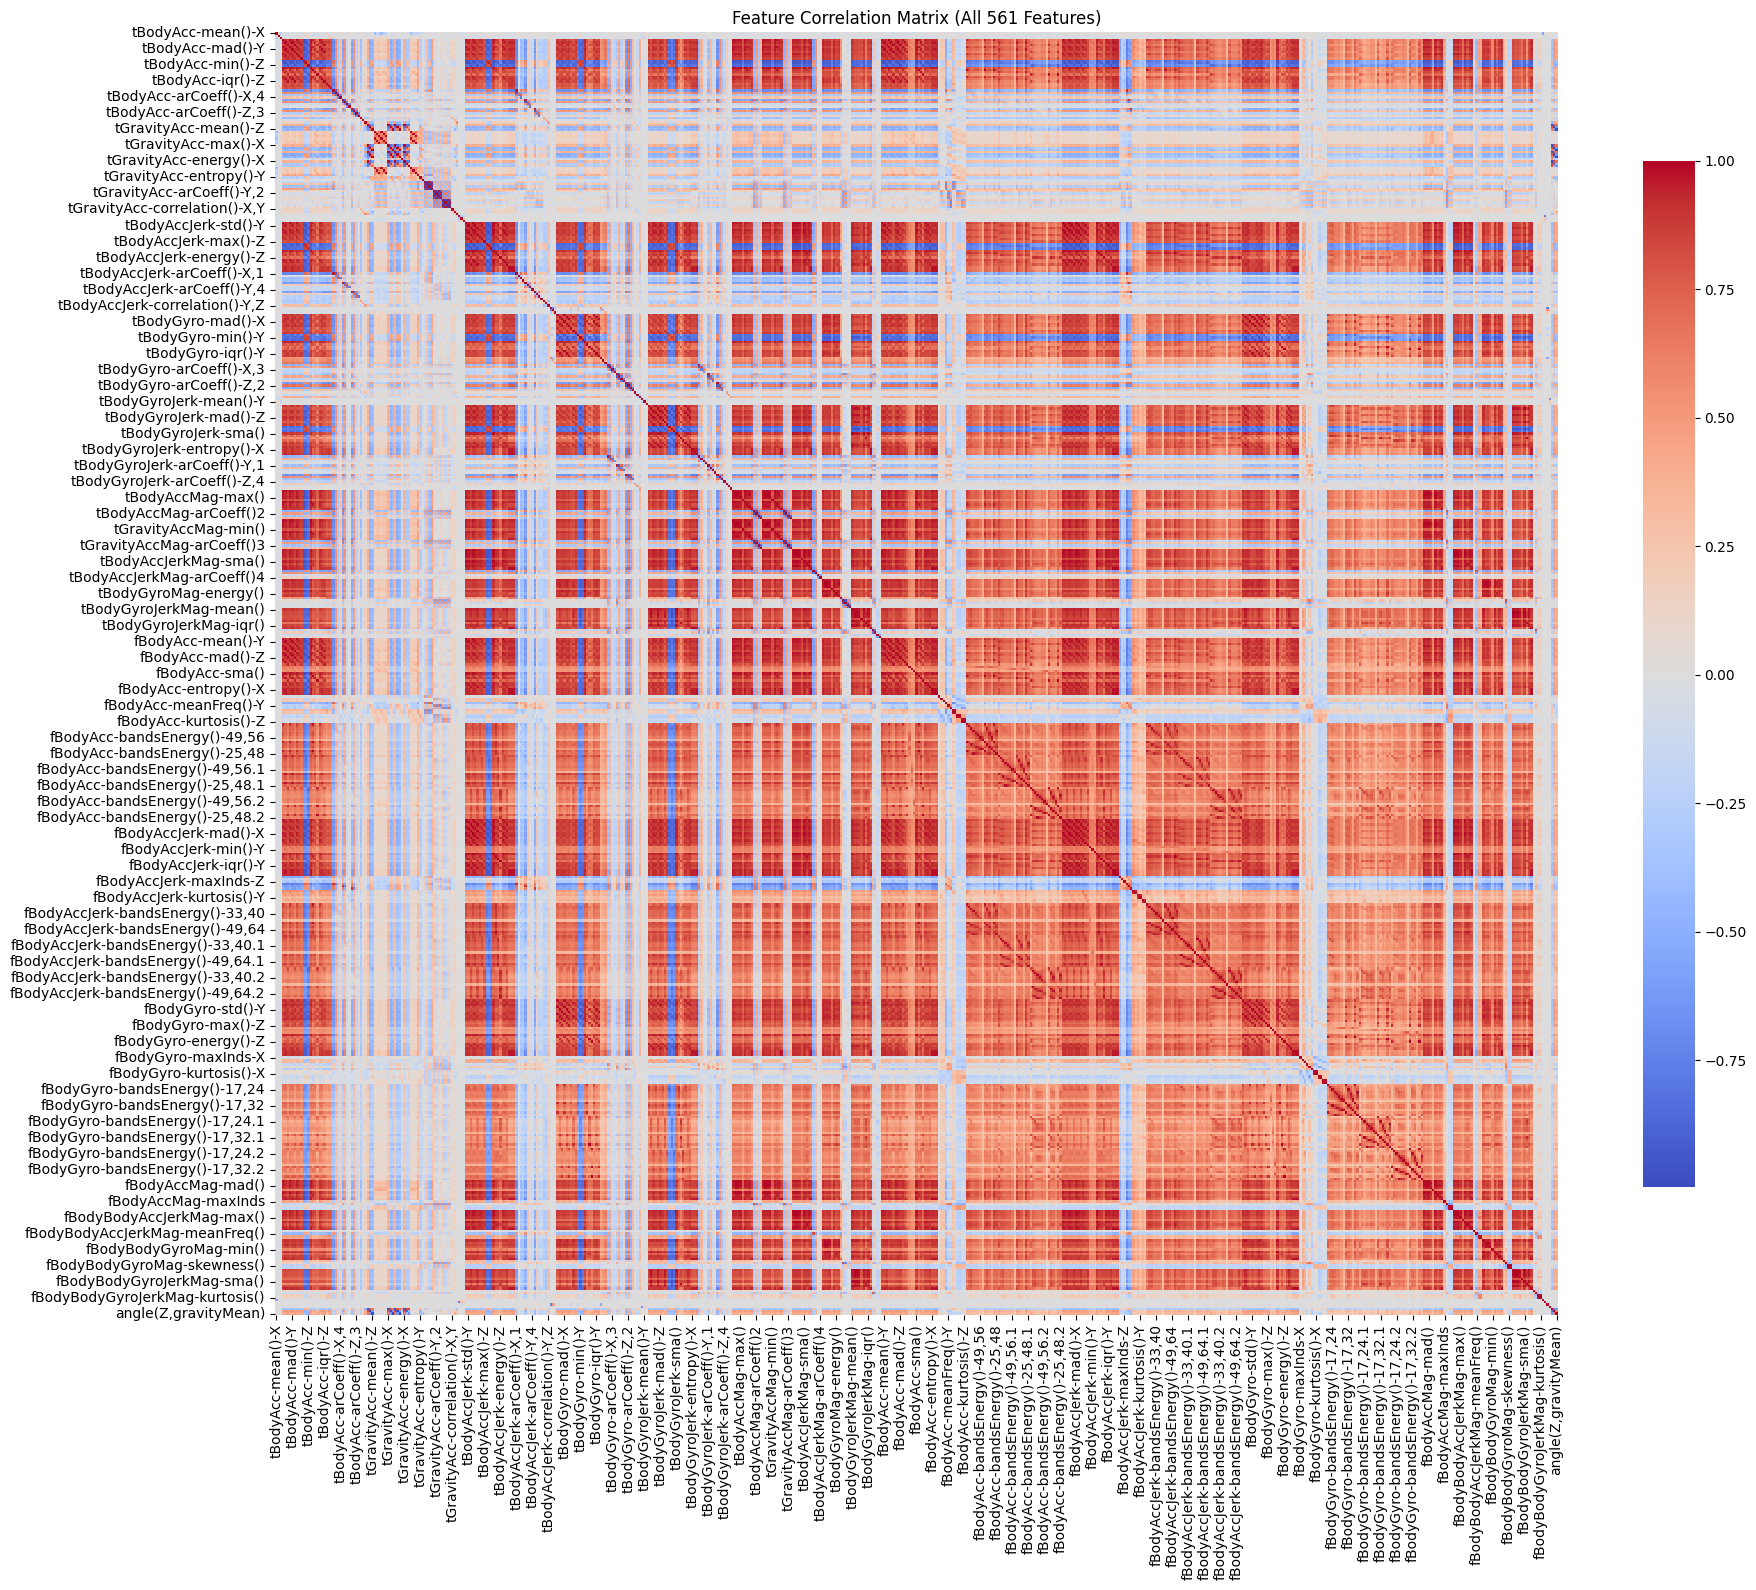

Number of feature pairs with correlation > 0.8: 23058
Percentage of highly correlated pairs: 14.68%


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate correlation matrix for all features
correlation_matrix = X_train.corr()

# Create a large heatmap (this will be quite detailed with 561 features)
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, 
            cmap='coolwarm', 
            center=0,
            square=True,
            cbar_kws={'shrink': 0.8})
plt.title('Feature Correlation Matrix (All 561 Features)')
plt.tight_layout()
plt.show()


# Find highly correlated features
high_corr_features = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            high_corr_features.append((correlation_matrix.columns[i], 
                                     correlation_matrix.columns[j], 
                                     correlation_matrix.iloc[i, j]))

print(f"Number of feature pairs with correlation > 0.8: {len(high_corr_features)}")
print(f"Percentage of highly correlated pairs: {len(high_corr_features)/(len(correlation_matrix.columns)*(len(correlation_matrix.columns)-1)/2)*100:.2f}%")

### Feature Scaling

In [16]:
# 2. Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Label Encoding

In [17]:
# 3. Encode target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

print("Preprocessing complete.")
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"y_train_encoded shape: {y_train_encoded.shape}")
print(f"Classes: {le.classes_}")

Preprocessing complete.
X_train_scaled shape: (7352, 561)
y_train_encoded shape: (7352,)
Classes: ['LAYING' 'SITTING' 'STANDING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']


### Feature Reduction using PCA

We will plot cummulative explained variance ratio vs no. features and see where the curve flattens out to choose optimal number of features.

PCA FEATURE REDUCTION
Original features: 561
PCA components: 561


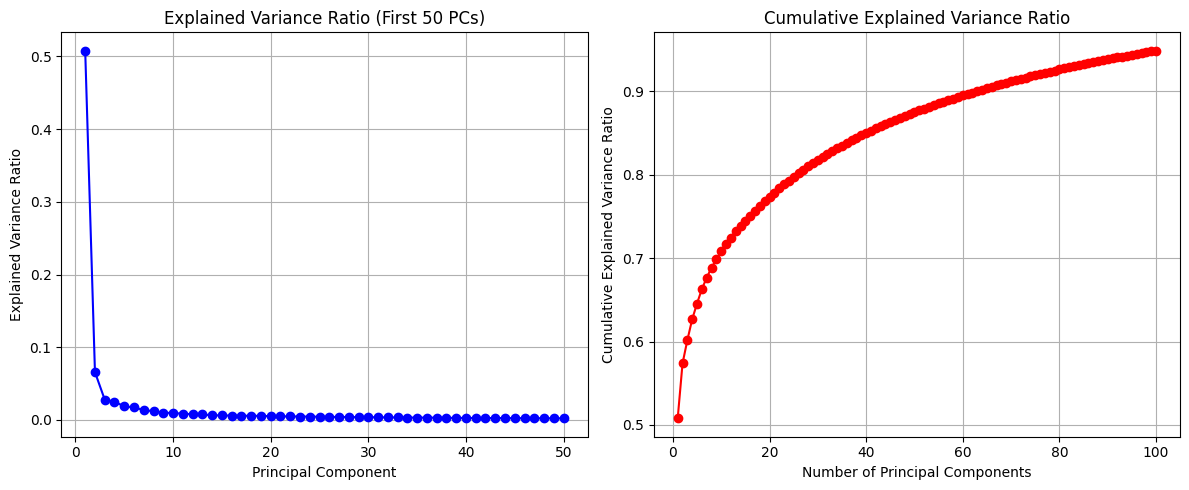


Number of components for:
  90% variance: 63
  95% variance: 102
  99% variance: 179

Feature reduction complete!
Original features: 561
Reduced features: 62
Reduction: 88.9%
Variance explained: 0.899


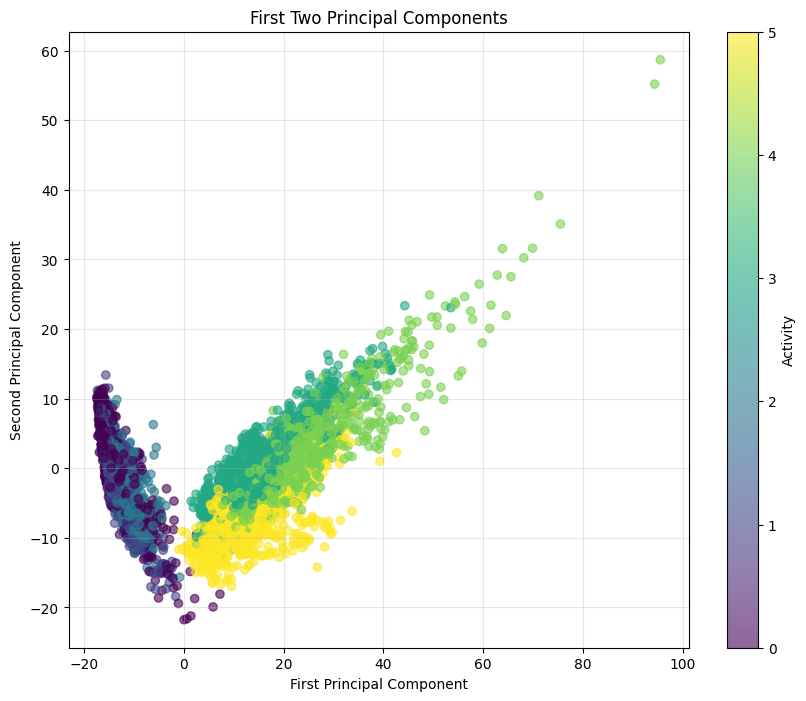

In [19]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# apply PCA
print("PCA FEATURE REDUCTION")
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# 2. Analyze explained variance
print(f"Original features: {X_train_scaled.shape[1]}")
print(f"PCA components: {X_train_pca.shape[1]}")

# Plot explained variance ratio
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, 51), pca.explained_variance_ratio_[:50], 'bo-')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio (First 50 PCs)')
plt.grid(True)

plt.subplot(1, 2, 2)
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(1, 101), cumulative_variance[:100], 'ro-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio')
plt.grid(True)

plt.tight_layout()
plt.show()

# Find optimal number of components
n_components_90 = np.argmax(cumulative_variance >= 0.90) + 1
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
n_components_99 = np.argmax(cumulative_variance >= 0.99) + 1

print(f"\nNumber of components for:")
print(f"  90% variance: {n_components_90}")
print(f"  95% variance: {n_components_95}")
print(f"  99% variance: {n_components_99}")

# Create reduced feature sets
# Let's use 62 feature components which proved 90% variance
n_components = 62
X_train_reduced = X_train_pca[:, :n_components]
X_test_reduced = X_test_pca[:, :n_components]

print(f"\nFeature reduction complete!")
print(f"Original features: {X_train_scaled.shape[1]}")
print(f"Reduced features: {X_train_reduced.shape[1]}")
print(f"Reduction: {((X_train_scaled.shape[1] - X_train_reduced.shape[1]) / X_train_scaled.shape[1] * 100):.1f}%")
print(f"Variance explained: {cumulative_variance[n_components-1]:.3f}")

# 5. Quick visualization of first 2 components
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_train_reduced[:, 0], X_train_reduced[:, 1], 
                     c=y_train_encoded, cmap='viridis', alpha=0.6)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('First Two Principal Components')
plt.colorbar(scatter, label='Activity')
plt.grid(True, alpha=0.3)
plt.show()

# Unsuprvised Model Building

Now we use our final data to classify activity from our final feature set. For this multi-class classification problem we will try 5 different supervised machine learning models(techniques) we learned in class. After training we will evaluate the perfomance of each model based on three parameters - `training_time`, `accuarcy` and `cross validation score`. We will also plot confusion matrix for each model. Below, is lets of all models used:

1. ***Logistic Regression***:
Logistic Regression is a Linear classifier that models the probability that a given input belongs to a particular class using a linear combination of input features and a logistic (sigmoid) function.

2. ***Support Vector Machine (SVM)***:
SVMs is both Linear and non-linear classifier that finds the optimal hyperplane that maximizes the margin between classes. We use both linear and RBF (Radial Basis Function) kernels to capture linear and non-linear relationships.

3. ***Random Forest***:
Random Forest builds an ensemble of decision trees, each trained on a random subset of the data and features. The final prediction is made by aggregating the predictions of all trees (majority voting).

4. ***Gradient Boosting Classifier***:
 Gradient Boosting is an Ensemble, boosting-based classifier builds trees sequentially, where each new tree attempts to correct the errors of the previous ensemble. It optimizes a loss function using gradient descent.

5. ***K-Nearest Neighbors (KNN)***:
KNN classifies a sample based on the majority class among its k-nearest neighbors in the feature space, using a distance metric (typically Euclidean). This is much simpler technique with no training phase and usually effective for small datasets and when the decision boundary is irregular. Note: For this dataset this is not an ideal candidate but we still want comapre it with other model.

# Unsuprvised Model Building

Now we use our final data to classify activity from our final feature set. For this multi-class classification problem we will try 5 different supervised machine learning models(techniques) we learned in class. After training we will evaluate the perfomance of each model based on three parameters - `training_time`, `accuarcy` and `cross validation score`. We will also plot confusion matrix for each model. Below, is lets of all models used:

1. ***Logistic Regression***:
Logistic Regression is a Linear classifier that models the probability that a given input belongs to a particular class using a linear combination of input features and a logistic (sigmoid) function.

2. ***Support Vector Machine (SVM)***:
SVMs is both Linear and non-linear classifier that finds the optimal hyperplane that maximizes the margin between classes. We use both linear and RBF (Radial Basis Function) kernels to capture linear and non-linear relationships.

3. ***Random Forest***:
Random Forest builds an ensemble of decision trees, each trained on a random subset of the data and features. The final prediction is made by aggregating the predictions of all trees (majority voting).

4. ***Gradient Boosting Classifier***:
 Gradient Boosting is an Ensemble, boosting-based classifier builds trees sequentially, where each new tree attempts to correct the errors of the previous ensemble. It optimizes a loss function using gradient descent.

5. ***K-Nearest Neighbors (KNN)***:
KNN classifies a sample based on the majority class among its k-nearest neighbors in the feature space, using a distance metric (typically Euclidean). This is much simpler technique with no training phase and usually effective for small datasets and when the decision boundary is irregular. Note: For this dataset this is not an ideal candidate but we still want comapre it with other model.

# Unsuprvised Model Building

Now we use our final data to classify activity from our final feature set. For this multi-class classification problem we will try 5 different supervised machine learning models(techniques) we learned in class. After training we will evaluate the perfomance of each model based on three parameters - `training_time`, `accuarcy` and `cross validation score`. We will also plot confusion matrix for each model. Below, is lets of all models used:

1. ***Logistic Regression***:
Logistic Regression is a Linear classifier that models the probability that a given input belongs to a particular class using a linear combination of input features and a logistic (sigmoid) function.

2. ***Support Vector Machine (SVM)***:
SVMs is both Linear and non-linear classifier that finds the optimal hyperplane that maximizes the margin between classes. We use both linear and RBF (Radial Basis Function) kernels to capture linear and non-linear relationships.

3. ***Random Forest***:
Random Forest builds an ensemble of decision trees, each trained on a random subset of the data and features. The final prediction is made by aggregating the predictions of all trees (majority voting).

4. ***Gradient Boosting Classifier***:
 Gradient Boosting is an Ensemble, boosting-based classifier builds trees sequentially, where each new tree attempts to correct the errors of the previous ensemble. It optimizes a loss function using gradient descent.

5. ***K-Nearest Neighbors (KNN)***:
KNN classifies a sample based on the majority class among its k-nearest neighbors in the feature space, using a distance metric (typically Euclidean). This is much simpler technique with no training phase and usually effective for small datasets and when the decision boundary is irregular. Note: For this dataset this is not an ideal candidate but we still want comapre it with other model.

## Model Comparison and Final Results

=== MODEL TRAINING AND COMPARISON ===
Training models on reduced feature set (62 PCA components)...
------------------------------------------------------------
Training Logistic Regression...
  Accuracy: 0.9199
  CV Score: 0.9070 (+/- 0.0556)
  Training Time: 8.97s



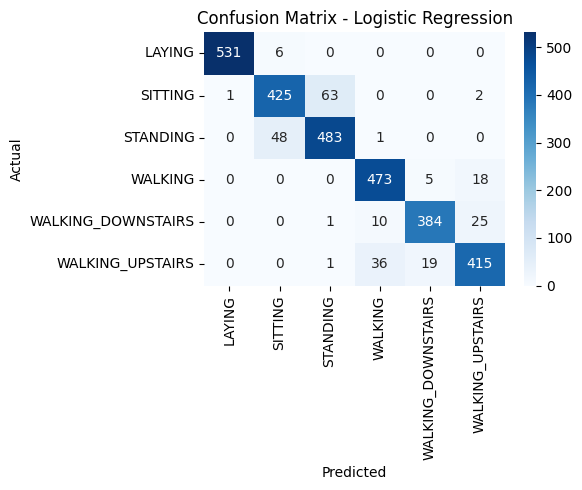

Training Random Forest...
  Accuracy: 0.8758
  CV Score: 0.8547 (+/- 0.0397)
  Training Time: 32.10s



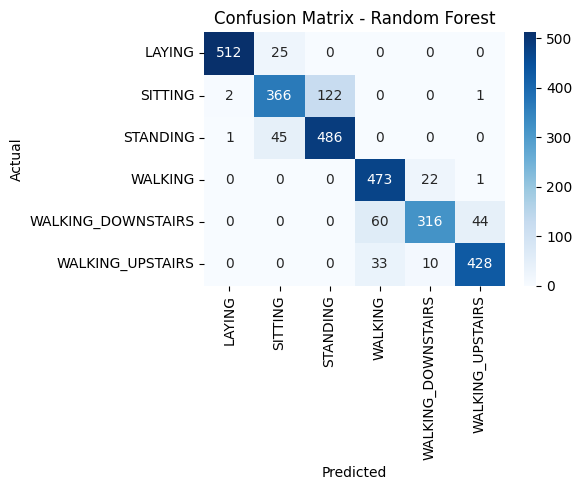

Training Gradient Boosting...
  Accuracy: 0.8829
  CV Score: 0.8566 (+/- 0.0555)
  Training Time: 600.83s



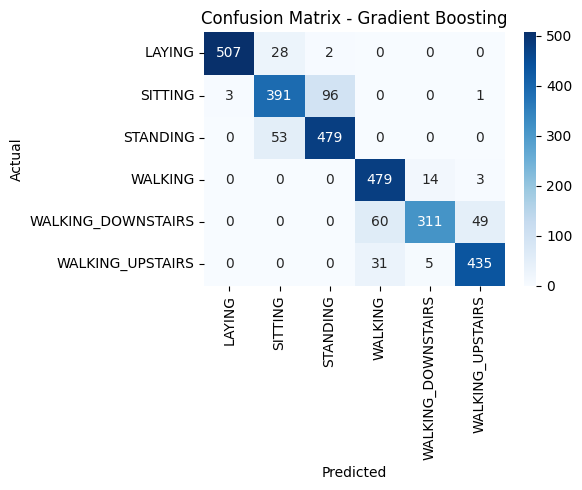

Training SVM (Linear)...
  Accuracy: 0.9125
  CV Score: 0.9077 (+/- 0.0530)
  Training Time: 3.96s



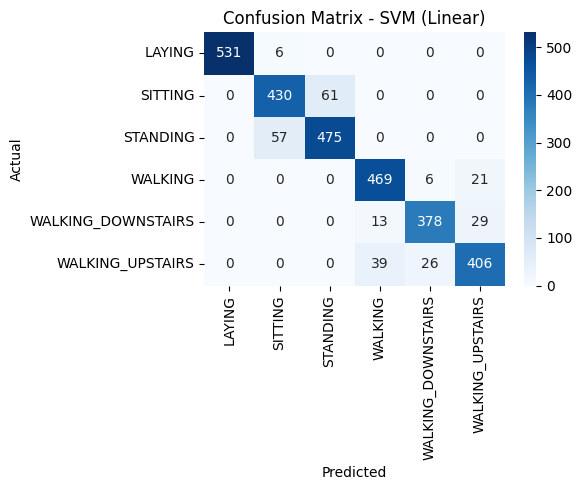

Training SVM (RBF)...
  Accuracy: 0.9158
  CV Score: 0.8999 (+/- 0.0410)
  Training Time: 8.06s



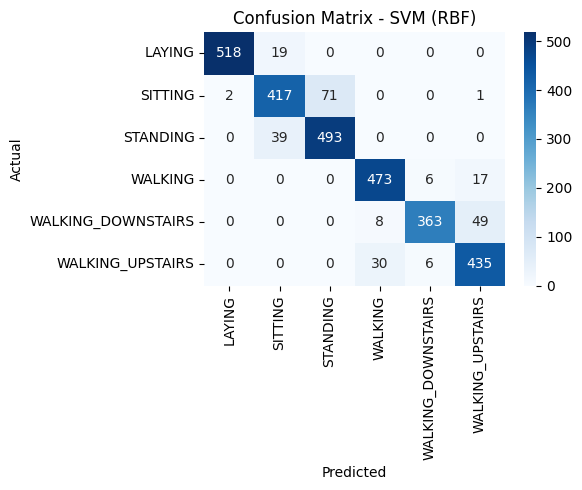

Training K-Nearest Neighbors...
  Accuracy: 0.8619
  CV Score: 0.8569 (+/- 0.0343)
  Training Time: 0.41s



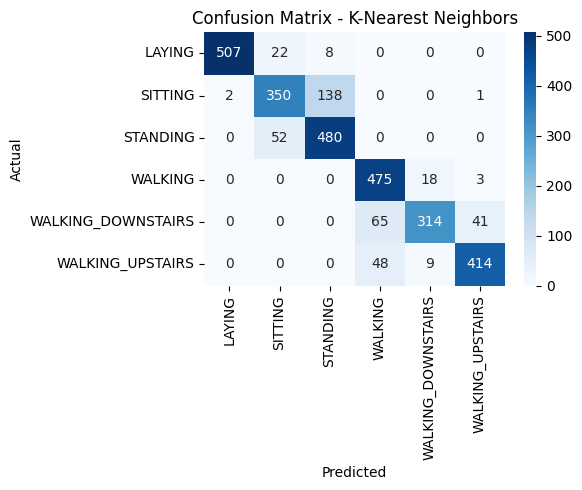

=== RESULTS SUMMARY ===
--------------------------------------------------------------------------------
Model                Accuracy   CV Score     CV Std   Time(s) 
--------------------------------------------------------------------------------
Logistic Regression  0.9199     0.9070       0.0278   8.97    
Random Forest        0.8758     0.8547       0.0199   32.10   
Gradient Boosting    0.8829     0.8566       0.0277   600.83  
SVM (Linear)         0.9125     0.9077       0.0265   3.96    
SVM (RBF)            0.9158     0.8999       0.0205   8.06    
K-Nearest Neighbors  0.8619     0.8569       0.0172   0.41    

Best Model: Logistic Regression (Accuracy: 0.9199)


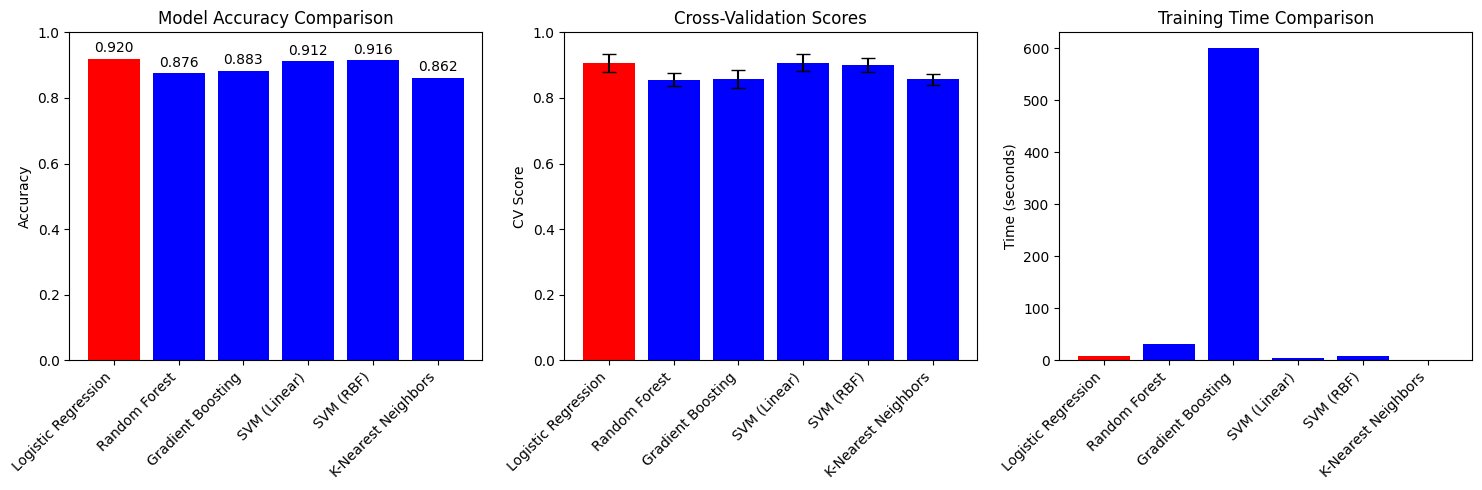


=== DETAILED ANALYSIS OF BEST MODEL: Logistic Regression ===
------------------------------------------------------------
Classification Report:
                    precision    recall  f1-score   support

            LAYING       1.00      0.99      0.99       537
           SITTING       0.89      0.87      0.88       491
          STANDING       0.88      0.91      0.89       532
           WALKING       0.91      0.95      0.93       496
WALKING_DOWNSTAIRS       0.94      0.91      0.93       420
  WALKING_UPSTAIRS       0.90      0.88      0.89       471

          accuracy                           0.92      2947
         macro avg       0.92      0.92      0.92      2947
      weighted avg       0.92      0.92      0.92      2947



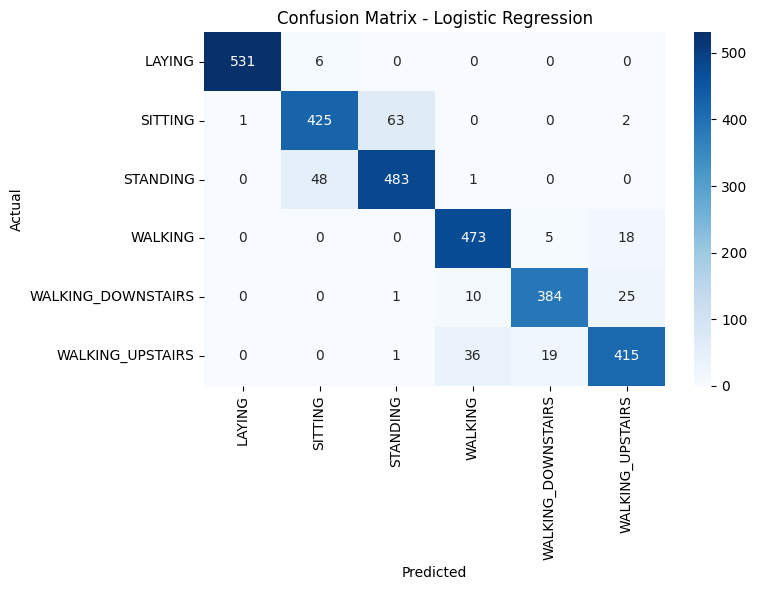


Top 10 Most Important PCA Components (Coefficients):
 1. Component 5: 1.8166
 2. Component 4: 1.2640
 3. Component 3: 1.1848
 4. Component 40: 0.9010
 5. Component 39: 0.8852
 6. Component 17: 0.7451
 7. Component 27: 0.7280
 8. Component 31: 0.7180
 9. Component 1: 0.6776
10. Component 43: 0.6473

=== SUMMARY ===
Best performing model: Logistic Regression
Test accuracy: 0.9199
Cross-validation score: 0.9070 (+/- 0.0556)
Training time: 8.97 seconds


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import time

# Define models to compare
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'SVM (Linear)': SVC(kernel='linear', random_state=42),
    'SVM (RBF)': SVC(kernel='rbf', random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
}

# Results storage
results = {}

print("=== MODEL TRAINING AND COMPARISON ===")
print(f"Training models on reduced feature set ({n_components} PCA components)...")
print("-" * 60)

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")
    
    # Time the training
    start_time = time.time()
    
    # Train the model
    model.fit(X_train_reduced, y_train_encoded)
    
    # Make predictions
    y_pred = model.predict(X_test_reduced)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test_encoded, y_pred)
    
    # Cross-validation score
    cv_scores = cross_val_score(model, X_train_reduced, y_train_encoded, cv=5)
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()
    
    # Training time
    training_time = time.time() - start_time
    
    # Store results
    results[name] = {
        'accuracy': accuracy,
        'cv_mean': cv_mean,
        'cv_std': cv_std,
        'training_time': training_time,
        'model': model,
        'predictions': y_pred
    }
    
    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  CV Score: {cv_mean:.4f} (+/- {cv_std*2:.4f})")
    print(f"  Training Time: {training_time:.2f}s")
    print()

    # Plot confusion matrix for each model
    plt.figure(figsize=(6, 5))
    cm = confusion_matrix(y_test_encoded, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

# Create comparison table
print("=== RESULTS SUMMARY ===")
print("-" * 80)
print(f"{'Model':<20} {'Accuracy':<10} {'CV Score':<12} {'CV Std':<8} {'Time(s)':<8}")
print("-" * 80)

for name, result in results.items():
    print(f"{name:<20} {result['accuracy']:<10.4f} {result['cv_mean']:<12.4f} "
          f"{result['cv_std']:<8.4f} {result['training_time']:<8.2f}")

# Find best model
best_model_name = max(results.keys(), key=lambda x: results[x]['accuracy'])
best_model = results[best_model_name]['model']
best_accuracy = results[best_model_name]['accuracy']

print(f"\nBest Model: {best_model_name} (Accuracy: {best_accuracy:.4f})")

# Visualize results
plt.figure(figsize=(15, 5))

# Accuracy comparison
plt.subplot(1, 3, 1)
model_names = list(results.keys())
accuracies = [results[name]['accuracy'] for name in model_names]
colors = ['red' if name == best_model_name else 'blue' for name in model_names]
bars = plt.bar(model_names, accuracies, color=colors)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)

# Add value labels on bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{acc:.3f}', ha='center', va='bottom')

# Cross-validation scores
plt.subplot(1, 3, 2)
cv_means = [results[name]['cv_mean'] for name in model_names]
cv_stds = [results[name]['cv_std'] for name in model_names]
plt.bar(model_names, cv_means, yerr=cv_stds, capsize=5, color=colors)
plt.title('Cross-Validation Scores')
plt.ylabel('CV Score')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)

# Training time comparison
plt.subplot(1, 3, 3)
training_times = [results[name]['training_time'] for name in model_names]
plt.bar(model_names, training_times, color=colors)
plt.title('Training Time Comparison')
plt.ylabel('Time (seconds)')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Detailed analysis of best model
print(f"\n=== DETAILED ANALYSIS OF BEST MODEL: {best_model_name} ===")
print("-" * 60)

# Classification report
print("Classification Report:")
print(classification_report(y_test_encoded, results[best_model_name]['predictions'], 
                          target_names=le.classes_))

# Confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_encoded, results[best_model_name]['predictions'])
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Feature importance (if applicable)
if hasattr(best_model, 'feature_importances_'):
    print("\nTop 10 Most Important PCA Components:")
    importances = best_model.feature_importances_
    top_indices = np.argsort(importances)[-10:][::-1]
    for i, idx in enumerate(top_indices):
        print(f"{i+1:2d}. Component {idx+1}: {importances[idx]:.4f}")
elif hasattr(best_model, 'coef_'):
    print("\nTop 10 Most Important PCA Components (Coefficients):")
    coefs = np.abs(best_model.coef_[0])
    top_indices = np.argsort(coefs)[-10:][::-1]
    for i, idx in enumerate(top_indices):
        print(f"{i+1:2d}. Component {idx+1}: {coefs[idx]:.4f}")

print(f"\n=== SUMMARY ===")
print(f"Best performing model: {best_model_name}")
print(f"Test accuracy: {best_accuracy:.4f}")
print(f"Cross-validation score: {results[best_model_name]['cv_mean']:.4f} (+/- {results[best_model_name]['cv_std']*2:.4f})")
print(f"Training time: {results[best_model_name]['training_time']:.2f} seconds")

## Hyperparameter Tuning for Logistic Regression Model

Now that we have identified our best model in terms of accuracy is Logistic Regression with test accuracy of 91.9%, we will try to do some hyperparameter tuning to try to increase accuracy. We use `GridSearchCV` tool in scikit-learn to automatically find the best combination of hyperparameters for logistic regression model. Below code will identify best combination of hyperparameters.

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

# Define the parameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'],  # 'l1' and 'elasticnet' require specific solvers and may not work with multi-class
    'solver': ['lbfgs', 'saga'],  # 'lbfgs' and 'saga' support multiclass
    'max_iter': [1000]
}

# Initialize the model
logreg = LogisticRegression(random_state=42, multi_class='auto')

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=logreg,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

# Fit to the training data
grid_search.fit(X_train_reduced, y_train_encoded)

# Best parameters and score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy: {:.4f}".format(grid_search.best_score_))

# Evaluate on test set
best_logreg = grid_search.best_estimator_
y_pred = best_logreg.predict(X_test_reduced)
test_accuracy = accuracy_score(y_test_encoded, y_pred)
print("Test Accuracy with Best Hyperparameters: {:.4f}".format(test_accuracy))

# Classification report
print("\nClassification Report:")
print(classification_report(y_test_encoded, y_pred, target_names=le.classes_))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ....C=0.01, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.7s
[CV] END ....C=0.01, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.9s
[CV] END ....C=0.01, max_iter=1000, penalty=l2, solver=lbfgs; total time=   1.0s
[CV] END ....C=0.01, max_iter=1000, penalty=l2, solver=lbfgs; total time=   1.0s
[CV] END ....C=0.01, max_iter=1000, penalty=l2, solver=lbfgs; total time=   1.3s
[CV] END .....C=0.1, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.6s
[CV] END .....C=0.1, max_iter=1000, penalty=l2, solver=lbfgs; total time=   1.0s
[CV] END .....C=0.1, max_iter=1000, penalty=l2, solver=lbfgs; total time=   1.0s
[CV] END .....C=0.01, max_iter=1000, penalty=l2, solver=saga; total time=   2.6s
[CV] END .....C=0.1, max_iter=1000, penalty=l2, solver=lbfgs; total time=   1.2s
[CV] END .....C=0.1, max_iter=1000, penalty=l2, solver=lbfgs; total time=   0.9s
[CV] END .....C=0.01, max_iter=1000, penalty=l2,

## Final Conclusion and Discussion
This project successfully explored the application of various supervised machine learning models for Human Activity Recognition (HAR) using smartphone sensor data. Now we know how our fitness trackers or smartphone detects activities. 

We performed Exploratory Data Analysis (EDA) which lead us to perform some feature optimization. After that we Applied 6 different clasification algorithms and compare their performance. 

### Key Findings 

 - The results indicate that Logistic Regression and Support Vector Machine (SVM) with a Linear kernel emerged as the top-performing models in this analysis, both achieving impressive test accuracies around 91-92% and strong cross-validation scores (0.9070 and 0.9077, respectively).

 - Linear SVM model is most optimal with the lowest training time of 3 sec and gave accuracy comparable to Logistic Regression. 
 
 - KNN showed the lowest performance among the evaluated models, with a test accuracy of 0.8619 and a CV score of 0.8569. This could be because even with dimensionality reduction with PCA it still suffered from the curse of dimensionality. Although it has fastest training time.

 - Tree-based ensemble methods achieved respectabl but not leading performance (0.8758 and 0.8829 accuracy respectively). They were slowest in training time.

 - For models it was difficult to diffrentite between SITTING and STANDING.


 ### Hyperparamter Tuning
For logistic regression our highest performing model model we did some hyperparameter tuning using Grid Search Cross Validation. `Best Hyperparameters: {'C': 10, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'saga'}`


## Future Work

- Systematically optimizing the hyperparameters of the other best-performing models SVM and exploring tuning for Random Forest and Gradient Boosting to see if their performance can match or surpass the linear models.

- While pre-extracted features were used in this project, exploring custom feature engineering from the raw inertial signals could yield even more discriminative features, due to current time contraint could not be done in this project.

In conclusion, for this specific Human Activity Recognition dataset, simpler linear models proved highly effective and efficient, providing a robust solution for activity classification.

